In [1]:
import pandas as pd

In [2]:
data = pd.read_csv(r'C:\Users\vinee\OneDrive\Desktop\FProjects\Hate_Data.csv')

In [3]:
data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [4]:
for index, tweet in  enumerate(data['tweet'][10:15]):
    print(index+1, ".", tweet)

1 .  â #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
2 . we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
3 . i get to see my daddy today!!   #80days #gettingfed
4 . ouch...junior is angryð#got7 #junior #yugyoem   #omg 
5 . i am thankful for having a paner. #thankful #positive     


In [5]:
import re

def clean_text(text):
    
    text = re.sub(r'[^a-zA-Z\']', ' ', text)
    
    
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)
    
    text = text.lower()
    
    return text

In [6]:
data['clean_text'] = data.tweet.apply(lambda x : clean_text(x))

In [7]:
data.head()

,id,label,tweet,clean_text
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now motivation


In [10]:
from wordcloud import STOPWORDS

print(STOPWORDS)

{"didn't", "he'll", 'hers', "where's", "i'm", 'yourselves', 'off', 'or', 'ours', 'yours', 'which', 'how', "they'll", "isn't", 'r', 'shall', 'ourselves', "here's", 'like', 'this', "i've", 'her', 'my', 'each', 'himself', 'com', 'very', 'you', 'both', 'same', "why's", 'over', 'against', "aren't", "you'd", "shouldn't", "i'll", 'are', "don't", 'is', 'it', 'at', "she'd", 'cannot', "who's", 'once', 'these', 'under', 'he', 'why', "weren't", 'few', 'should', 'your', 'if', 'when', "you'll", 'with', 'http', 'its', 'am', 'up', 'own', 'else', 'they', "you're", "doesn't", "shan't", 'would', 'their', "he's", 'the', "wasn't", 'she', 'there', "she'll", 'any', 'as', "wouldn't", 'doing', 'an', 'about', 'during', 'from', 'into', 'has', 'nor', 'for', 'that', 'themselves', 'all', 'down', 'were', 'can', "what's", 'whom', 'until', "hasn't", 'was', "she's", "we've", "couldn't", "can't", 'no', 'be', 'ought', "they're", 'out', 'get', 'herself', 'more', 'been', "you've", 'our', 'here', 'also', "we're", 'only', 'a

In [56]:
def gen_freq(text):
    word_list = []
    
    for words in text.split():
        word_list.extend(words)
        
    word_freq = pd.Series(word_list).value_counts()
    
    word_freq = word_freq.drop(labels = STOPWORDS, errors='ignore')
    
    return word_freq

In [57]:
word_freq = gen_freq(data.clean_text.str)
rare_100 = word_freq[-100:]
#print(word_freq)

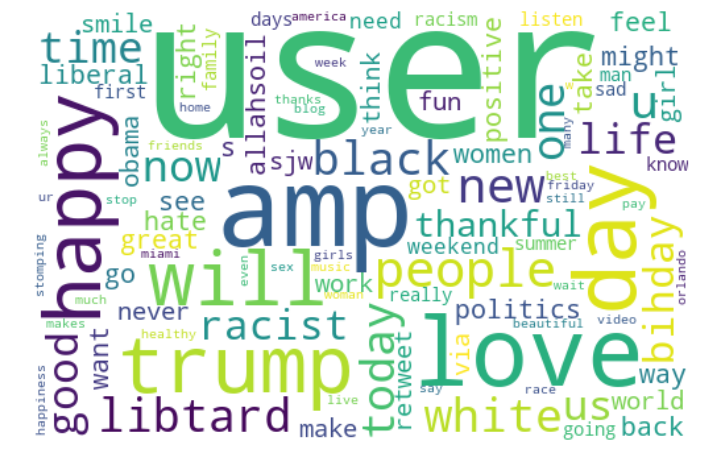

In [102]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
wc = WordCloud(width=500, height=330, max_words=100, background_color = 'white').generate_from_frequencies(word_freq)

plt.figure(figsize=(12,8))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [58]:
#check whether a negative term is present in the text or not
def any_neg(words):
    for word in words:
        if word in ['n', 'no','non','not'] or re.search(r"\wn't", str(word)):
            return 1
        else:
            return 0

In [59]:
any_neg(data.clean_text.str.split())

0

In [60]:
#check whether one of the 100 rare words is present in the text
def any_rare(words, rare_100):
    for word in words:
        if word in rare_100:
            return 1
        else:
            return 0

In [61]:
any_rare(data.clean_text.str.split(), tuple(rare_100))

0

In [64]:
def is_question(words):
    for word in words:
        if word in ['when','what','how','why','who']:
            return 1
        else:
            return 0

In [65]:
is_question(data.clean_text.str.split())

0

In [67]:
data['word_count'] = data.clean_text.str.split().apply(lambda x: len(x))

In [68]:
data.head()

,id,label,tweet,clean_text,word_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19
2,3,0,bihday your majesty,bihday your majesty,3
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4


In [69]:
data['any_neg'] = data.clean_text.str.split().apply(lambda x: any_neg(x))

In [72]:
data['is_question'] = data.clean_text.str.split().apply(lambda x: is_question(x))

In [74]:
data['rare_100'] = data.clean_text.str.split().apply(lambda x: any_rare(x, rare_100))

In [76]:
data['char_count'] = data.clean_text.apply(lambda x : len(x))

In [77]:
data

,id,label,tweet,clean_text,word_count,any_neg,is_question,rare_100,char_count
0,1,0,@user when a father is dysfunctional and is s...,user when a father is dysfunctional and is s...,18,0,0,0,102
1,2,0,@user @user thanks for #lyft credit i can't us...,user user thanks for lyft credit i can't us...,19,0,0,0,122
2,3,0,bihday your majesty,bihday your majesty,3,0,0,0,21
3,4,0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...,12,0,0,0,86
4,5,0,factsguide: society now #motivation,factsguide society now motivation,4,0,0,0,39
5,6,0,[2/2] huge fan fare and big talking before the...,huge fan fare and big talking before the...,18,0,0,0,116
6,7,0,@user camping tomorrow @user @user @user @use...,user camping tomorrow user user user use...,11,0,0,0,74
7,8,0,the next school year is the year for exams.ð...,the next school year is the year for exams ...,20,0,0,0,143
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,we won love the land allin cavs champ...,10,0,0,0,87
9,10,0,@user @user welcome here ! i'm it's so #gr...,user user welcome here i'm it's so gr...,8,0,0,0,50


In [88]:
from sklearn.model_selection import train_test_split
x = data[['word_count','any_neg','rare_100','char_count','is_question']]
y = data.label

In [90]:
x_train, x_test, y_train, y_test = train_test_split(x, y ,test_size = 0.1, random_state = 27)

In [91]:
from sklearn.naive_bayes import GaussianNB

In [92]:
model = GaussianNB()

In [93]:
model = model.fit(x_train, y_train)

In [94]:
pred = model.predict(x_test)

In [95]:
from sklearn.metrics import accuracy_score

print("Accuracy:", accuracy_score(y_test, pred)*100, "%")

Accuracy: 50.857142857142854 %


In [103]:
from sklearn.metrics import confusion_matrix

In [104]:
confusion_matrix(y_test, pred)

array([[ 79, 231],
       [ 27, 188]], dtype=int64)